In [1]:
# pip install chart-studio

In [2]:
import pyforest

from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import seaborn as sns

In [3]:
train_set = pd.read_csv('train.csv')
train_set

<IPython.core.display.Javascript object>

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_set.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
train_set.shape

(42000, 785)

In [7]:
test_set = pd.read_csv('test.csv')
test_set

<IPython.core.display.Javascript object>

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [9]:
test_set.shape

(28000, 784)

In [10]:
#Checking Nan values for the entire train set
train_set.isna().sum().sum()

0

In [11]:
#Checking Nan Values for the entire test set
test_set.isna().sum().sum()

0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

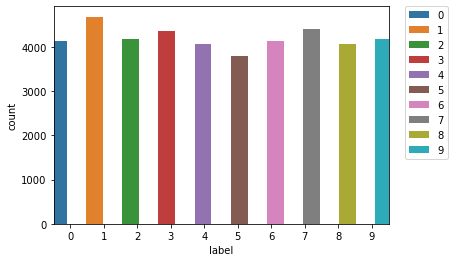

In [12]:
#Countplot of all the digits
fig, ax = plt.subplots()

sns.countplot(x='label', ax=ax, data=train_set, linewidth=5, hue='label')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .5)
plt.show()

## Train-Test Split:

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train_set.drop('label', axis=1)
y = train_set['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
#Scaling the data
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [15]:
#Reshaping 1D Vectors to 3d Matrices
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [16]:
from keras.utils.np_utils import to_categorical 

#Label Encoding Y_train
# y_train = to_categorical(y_train, num_classes=10)

In [17]:
y_train

39465    2
32503    2
22199    1
12604    6
14064    2
        ..
2131     0
18231    2
28776    1
144      5
34469    2
Name: label, Length: 33600, dtype: int64

In [18]:
X_train.shape

(33600, 28, 28, 1)

In [19]:
X_test.shape

(8400, 28, 28, 1)

<IPython.core.display.Javascript object>

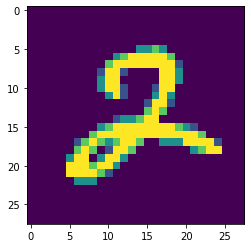

In [20]:
g = plt.imshow(X_train[11][:,:])

## Basemodel:

In [21]:
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', strides=1, activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', strides = 1, activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', strides = 1, activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
optimizer = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

In [24]:
model.compile(optimizer = optimizer, loss = "SparseCategoricalCrossentropy", metrics=["accuracy"])

In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.00001, verbose=1)

In [26]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.10, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [27]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=86), epochs = 30, 
                                  validation_data = (X_test, y_test), verbose = 2, 
                                  steps_per_epoch=X_train.shape[0] // 86, 
                                  callbacks=[learning_rate_reduction], 
                                  use_multiprocessing=False)

Epoch 1/30
390/390 - 64s - loss: 0.3896 - accuracy: 0.8898 - val_loss: 0.1541 - val_accuracy: 0.9576
Epoch 2/30
390/390 - 62s - loss: 0.1090 - accuracy: 0.9656 - val_loss: 0.0595 - val_accuracy: 0.9827
Epoch 3/30
390/390 - 61s - loss: 0.0892 - accuracy: 0.9718 - val_loss: 0.0759 - val_accuracy: 0.9768
Epoch 4/30
390/390 - 61s - loss: 0.0761 - accuracy: 0.9768 - val_loss: 0.0531 - val_accuracy: 0.9854
Epoch 5/30
390/390 - 62s - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.0408 - val_accuracy: 0.9904
Epoch 6/30
390/390 - 61s - loss: 0.0683 - accuracy: 0.9796 - val_loss: 0.0444 - val_accuracy: 0.9877
Epoch 7/30
390/390 - 61s - loss: 0.0614 - accuracy: 0.9803 - val_loss: 0.0383 - val_accuracy: 0.9893
Epoch 8/30

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
390/390 - 60s - loss: 0.0572 - accuracy: 0.9822 - val_loss: 0.0361 - val_accuracy: 0.9901
Epoch 9/30
390/390 - 61s - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0261 - val_accuracy: 0.9930
Epoch 10/3

In [28]:
history.history

{'loss': [0.38958990573883057,
  0.10899979621171951,
  0.08920545876026154,
  0.07608239352703094,
  0.07363858819007874,
  0.06834328174591064,
  0.061377160251140594,
  0.05724150687456131,
  0.04057515040040016,
  0.03117692656815052,
  0.028878210112452507,
  0.029452748596668243,
  0.02938821353018284,
  0.025318339467048645,
  0.026026947423815727,
  0.026103362441062927,
  0.02267521619796753,
  0.022736841812729836,
  0.020482545718550682,
  0.02041948214173317,
  0.018463268876075745,
  0.020189819857478142,
  0.01828359253704548,
  0.01809042878448963,
  0.018612748011946678,
  0.01780158281326294,
  0.015992265194654465,
  0.01609494350850582,
  0.016994720324873924,
  0.015930406749248505],
 'accuracy': [0.889777421951294,
  0.9656262993812561,
  0.971802830696106,
  0.9767559766769409,
  0.9777406454086304,
  0.9795607924461365,
  0.9803067445755005,
  0.9821865558624268,
  0.9872292280197144,
  0.9898251295089722,
  0.9899445176124573,
  0.9913468956947327,
  0.990958988

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

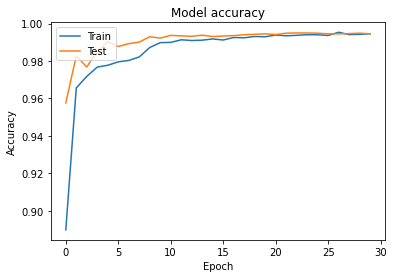

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

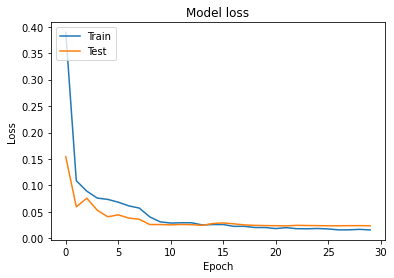

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
test = test_set.values.reshape(-1, 28, 28, 1)

In [31]:
test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [32]:
results = model.predict(test)

In [33]:
results

array([[6.2897129e-14, 1.9313735e-12, 1.0000000e+00, ..., 8.0880441e-12,
        6.6336316e-12, 1.1014167e-12],
       [9.9999797e-01, 7.6556192e-12, 3.3916172e-09, ..., 1.5262656e-09,
        6.3418796e-08, 1.4109427e-06],
       [3.3295727e-11, 6.2823761e-12, 7.2902463e-07, ..., 3.6845960e-10,
        7.3083352e-06, 9.9999154e-01],
       ...,
       [2.0512647e-22, 6.9344453e-14, 4.0823661e-16, ..., 4.6664941e-17,
        1.0270485e-12, 3.9274470e-13],
       [2.4808550e-10, 3.6796477e-12, 2.2114786e-09, ..., 1.0011949e-09,
        3.1714032e-07, 9.9999714e-01],
       [2.0258179e-17, 2.1885606e-17, 1.0000000e+00, ..., 4.8399079e-17,
        7.3162234e-13, 2.4141142e-15]], dtype=float32)

In [34]:
# results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
results

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64